<a href="https://colab.research.google.com/github/Paula2208/MetNumUN2023I/blob/master/Lab10/pguzmanzAlgorithmicToolboxWeek3SolvingNonLinearAlgebraicEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <b> LABORATORIO 10 - Métodos Numéricos <br>
Grupo 9<br>
- 09. Cardenas Zabala Juan Camilo <br>
- 31. Guzman Zabala Paula Daniela <br>
- 38. Lopez Nieto Nicolas <br>

# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$.

In [ ]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...

    nx = x0 - f(x0) / fder(x0)
    cont = 0

    while (abs(nx - x0) > eps):
        x0 = nx
        nx = x0 - f(x0) / fder(x0)
        cont += 1

        if cont > maxiter:
            break

    return nx, cont

### Test I.1

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

f = lambda x: x**2 - 1
fder = lambda x: 2 * x

root, cont = newton_iteration(f, fder, 0.05)
print('root:', root)
print('iteration times:', cont)

root: 1.0000000000149214
iteration times: 7


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

def modified_newton_iteration(func, fder, fdder, m, x0, eps=1e-5, maxiter=1000):


    def f(x):
        f = eval(func)
        return f

    def df(x):
        df = eval(fder)
        return df

    def ddf(x):
        ddf = eval(fdder)
        return ddf

    for niter in range (1, maxiter):

        deltax = - m*(f(x0) / df(x0))
        x0 = x0 + deltax
        x0 = x0

    print(f"Root:{x0}  Iteration:{maxiter}")

modified_newton_iteration("(x**2-1)**2","2*(x**2-1)*(2*x)","4*(3*x**2-1)", 4, 10, eps=1e-5, maxiter=1000)

Root:0.09999999999999964  Iteration:1000


In [ ]:
modified_newton_iteration("(x**2-1)**2","2*(x**2-1)*(2*x)","4*(3*x**2-1)", 1, 10, eps=1e-5, maxiter=1000)

modified_newton_iteration("(x**2-1)**2","2*(x**2-1)*(2*x)","4*(3*x**2-1)", 5, 10, eps=1e-5, maxiter=1000)

Root:1.0000000000000002  Iteration:1000
Root:-6.7688238823126  Iteration:1000


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

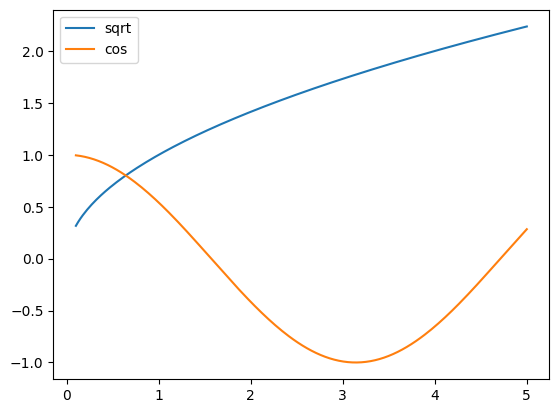

In [ ]:
# ... ENTER YOUR CODE HERE ...
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0.1, 5, 200)

plt.plot(x, np.sqrt(x), label='sqrt')
plt.plot(x, np.cos(x), label='cos')

plt.legend()

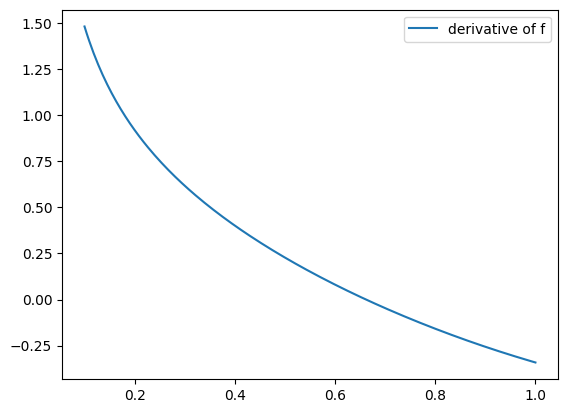

In [ ]:
f = lambda x: np.sqrt(x) - np.cos(x)
fder = lambda x: 1 / (2 * np.sqrt(x)) - np.sin(x)

x = np.linspace(0.1, 1, 200)

plt.plot(x, fder(x), label='derivative of f')
plt.legend()

In [ ]:
def newton_iteration_fixed_poinit(f, fder, x0, alpha, eps=1e-5, maxiter=1000):

    nx = x0 - alpha * f(x0)
    cont = 0

    while (abs(nx - x0) > eps):
        x0 = nx
        nx = x0 - alpha * f(x0)
        cont += 1

        if cont > maxiter:
            nx = 'Nan'
            break

    return nx, cont

In [ ]:

x0 = 2 / 3

for i in [0.1, 0.5, 1, 1.5]:
    root, cont = newton_iteration_fixed_poinit(f, fder, x0, i)
    print(i,',', root,',', cont)


0.1 , 0.6417846268333629 , 44
0.5 , 0.6417193751949732 , 8
1 , 0.6417136823927276 , 6
1.5 , 0.6417185143046147 , 47


# Part III. Newton's fractal.

(Not graded).

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points.
Color the grid in three colors, according to the root, to which iterations converged.

In [ ]:
import cmath

def newton_frac(x0):

    eps=1e-5
    maxiter=1000
    nx = x0 - (x0**3-1)/3*x0**2
    cont = x0

    for _ in range(maxiter):
        if(abs(nx-cont)<=eps):
            break
        if(abs(nx-cont)>1e2):
            return 0
        cont = nx
        nx = nx - (nx**3-1)/3*nx**2

    if abs(nx-cmath.exp(complex(0,2*np.pi*1/3)))<abs(nx-cmath.exp(complex(0,2*np.pi*2/3))):
        return 1
    else :
        return 2

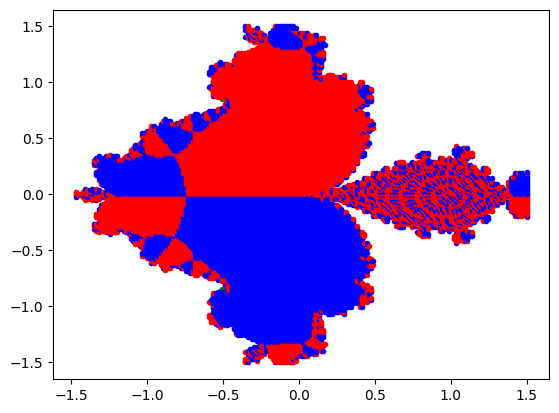

In [ ]:
x = np.linspace(-1.5, 1.5, 200)
y = np.linspace(-1.5, 1.5, 200)

for x0 in x:
    for y0 in y:
        fr = newton_frac(complex(x0,y0))
        if fr==1:
            plt.plot(x0, y0, marker='o', markersize=3, color='red')
        elif fr==2:
            plt.plot(x0, y0, marker='o', markersize=3, color='blue')

roots_x = []
roots_y = []
for i in range(3):
    z = cmath.exp(complex(0,2*np.pi*i/3))
    roots_x.append(z.real)
    roots_y.append(z.imag)

plt.scatter(roots_x, roots_y, c='g')
plt.show()